In [1]:
%load_ext autoreload
%autoreload 2

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter

np.set_printoptions(suppress=True)

In [73]:
%matplotlib inline

In [74]:
from initializations import (
    initialize_agents,
    initialize_beacons
)

from influences import (
    rotation_influence,
    position_influence,
    alignment_influence,
    cohesion_influence
)

from simulations import (
    look_at_beacon,
    move_to_beacon,
    look_with_neighbors,
    move_with_neighbors,
    individual_motion,
    collective_motion,
    motion_simulation
)

from diagnostics import (
    inspect_initialization,
    inspect_simulation,
    inspect_rotation_influence,
    inspect_position_influence,
    inspect_alignment_influence,
    inspect_cohesion_influence
)

In [75]:
agent_pos, agent_rot = initialize_agents(num_agents=24)
beacon_pos = initialize_beacons(room_sensing_range=20., num_beacons=12)

agent_rot

array([[-1.1782006 ],
       [-2.110182  ],
       [ 2.4721122 ],
       [ 1.3186142 ],
       [-1.1783568 ],
       [ 0.63476884],
       [-0.94004273],
       [ 1.2512983 ],
       [ 1.8551822 ],
       [-1.9927336 ],
       [-0.29362094],
       [-2.2952886 ],
       [-2.8799667 ],
       [-0.58196616],
       [-1.5269958 ],
       [ 0.21130079],
       [ 1.1458863 ],
       [-0.7696706 ],
       [ 2.3321242 ],
       [-0.04428538],
       [-2.0881293 ],
       [-2.525423  ],
       [ 3.116815  ],
       [ 1.561054  ]], dtype=float32)

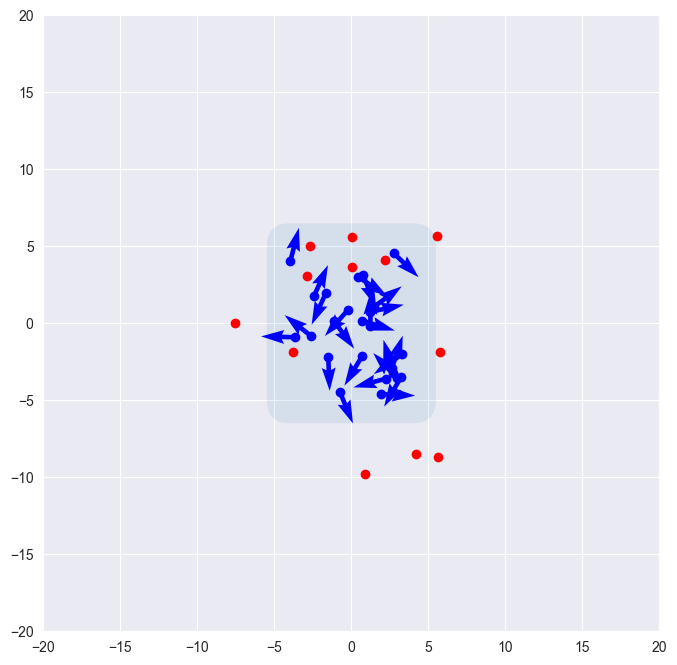

In [76]:
f = inspect_initialization(agent_pos, agent_rot, beacon_pos)

In [77]:
sim = motion_simulation(timesteps=300)
print(sim.shape)
sim[:,:,-1]

(300, 12, 3)


array([[4.56737727, 2.80866838, 4.6672327 , ..., 3.5944739 , 0.72526014,
        2.64937186],
       [4.52170283, 2.81439328, 4.61861593, ..., 3.57376916, 0.78495198,
        2.65926337],
       [4.47726125, 2.81998348, 4.57125301, ..., 3.55365903, 0.84323812,
        2.66892982],
       ...,
       [3.14141947, 3.1413219 , 3.12644059, ..., 3.12904436, 3.13976502,
        3.14123631],
       [3.14151746, 3.14132524, 3.12679774, ..., 3.12939126, 3.13980246,
        3.14116311],
       [3.14151556, 3.14134049, 3.1272102 , ..., 3.12963349, 3.13994765,
        3.14117122]])

### Full simulation

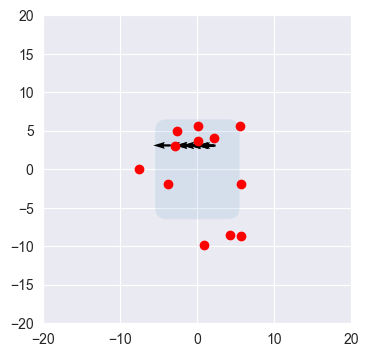

In [78]:
a = inspect_simulation(sim, beacon_pos)
a.save('./../media/gif/simulation.gif', writer=PillowWriter(fps=30))

### Rotation

Simulation of individual influences are unbounded in the test

In [23]:
ext_rotation = rotation_influence(agent_pos[0], agent_rot[0], beacon_pos[0])
ext_rotation

-2.22876707549811

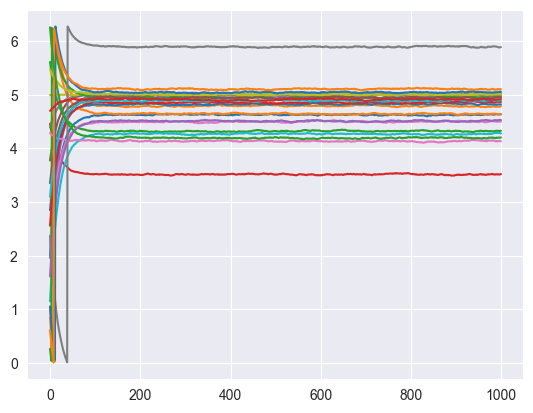

In [82]:
for i in range(len(agent_pos)):
    ext_rotation_sim = look_at_beacon(agent_pos[i], agent_rot[i], beacon_pos[-1], noise=0.2)
    plt.plot((ext_rotation_sim - np.pi) % (2 * np.pi))    

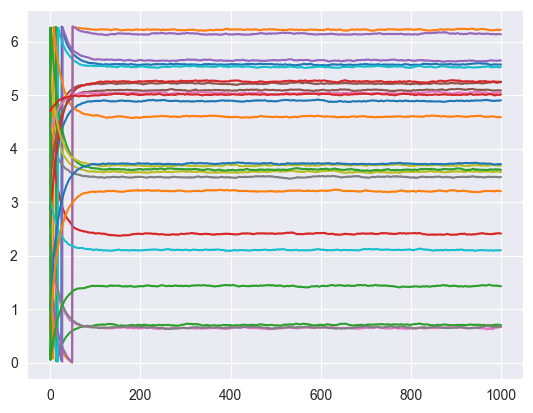

In [81]:
for i in range(len(agent_pos)):
    
    distance_to_beacon = np.linalg.norm(agent_pos[i] - beacon_pos, axis=1)
    id = np.argmin(distance_to_beacon)
    
    ext_rotation_sim = look_at_beacon(agent_pos[i], agent_rot[i], beacon_pos[id], noise=0.2)
    plt.plot((ext_rotation_sim - np.pi) % (2 * np.pi))

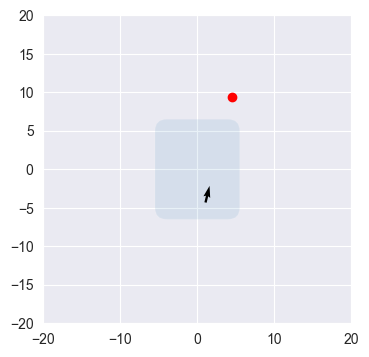

In [25]:
a = inspect_rotation_influence(ext_rotation_sim, agent_pos[-1], beacon_pos[-1])
a.save('./../media/gif/rotation1.gif', writer=PillowWriter(fps=10))

### Position

In [26]:
p_influence = position_influence(agent_pos[-1], beacon_pos[-1], noise=0.1)

direction = np.arctan2(beacon_pos[-1, 1] - agent_pos[-1, 1], beacon_pos[-1, 0] - agent_pos[-1, 0])

print(p_influence, direction)

1.3351214343302742 1.3236666


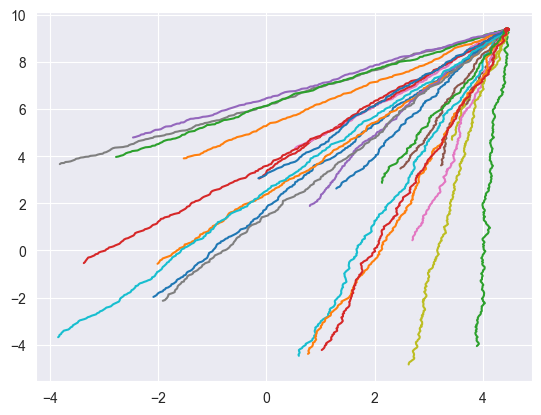

In [27]:
for i in range(len(agent_pos)):
    ext_position_sim = move_to_beacon(agent_pos[i], beacon_pos[-1], noise=1.)
    plt.plot(ext_position_sim[:,0], ext_position_sim[:,1])

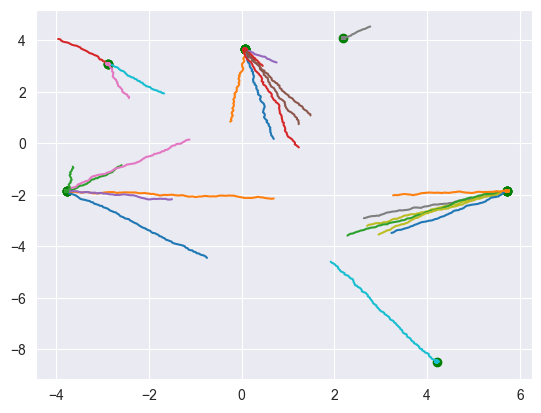

In [90]:
for i in range(len(agent_pos)):
    
    distance_to_beacon = np.linalg.norm(agent_pos[i] - beacon_pos, axis=1)
    id = np.argmin(distance_to_beacon)
    
    ext_position_sim = move_to_beacon(agent_pos[i], beacon_pos[id], noise=1)
    plt.plot(ext_position_sim[:,0], ext_position_sim[:,1])
    plt.scatter(beacon_pos[id, 0], beacon_pos[id, 1], color="g")

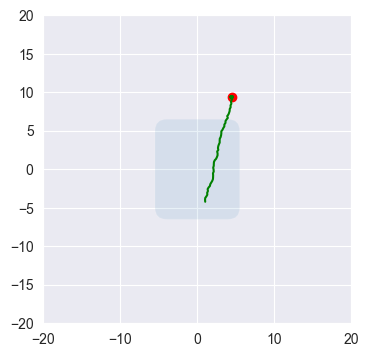

In [28]:
position_sim = move_to_beacon(agent_pos[-1], beacon_pos[-1], dt=0.5, timesteps=100, noise=1.)
b = inspect_position_influence(position_sim, beacon_pos[-1])
b.save('./../media/gif/position1.gif', writer=PillowWriter(fps=10))

### Individual Motion

In [105]:
timesteps = 1000
num_agents = len(agent_pos)
num_beacons = len(beacon_pos)

individual_motions = np.zeros((num_agents, timesteps, 3), dtype=np.float32)

for i in range(num_agents):
    
    distance_to_beacon = np.linalg.norm(agent_pos[i] - beacon_pos, axis=1)
    id = np.argmin(distance_to_beacon)
    
    individual_sim = individual_motion(agent_pos[i], agent_rot[i], beacon_pos[id])
    
    individual_motions[i] = individual_sim

individual_motions

array([[[-0.74716043, -4.450899  ,  5.1049848 ],
        [-0.78900737, -4.4235344 ,  4.9726443 ],
        [-0.82901967, -4.393551  ,  4.844161  ],
        ...,
        [-3.7999177 , -1.8560249 ,  0.8582598 ],
        [-3.7499177 , -1.8561313 ,  0.808869  ],
        [-3.7965062 , -1.874284  ,  0.9333054 ]],

       [[ 0.69244385, -2.1432006 ,  4.173003  ],
        [ 0.6425681 , -2.1396782 ,  4.1170325 ],
        [ 0.5929381 , -2.1457498 ,  4.062788  ],
        ...,
        [-3.7882085 , -1.8384523 ,  5.0489025 ],
        [-3.768935  , -1.8845884 ,  5.0586133 ],
        [-3.7877855 , -1.8382779 ,  5.2090425 ]],

       [[-2.5889559 , -0.84894717,  2.4721122 ],
        [-2.6284232 , -0.8796446 ,  2.5419855 ],
        [-2.663485  , -0.91529095,  2.6052282 ],
        ...,
        [-3.7612667 , -1.8390915 ,  1.4145768 ],
        [-3.7884948 , -1.8810275 ,  1.5497917 ],
        [-3.7634747 , -1.8377378 ,  1.5202074 ]],

       ...,

       [[ 3.266994  , -2.0221372 ,  3.7577622 ],
        [ 3

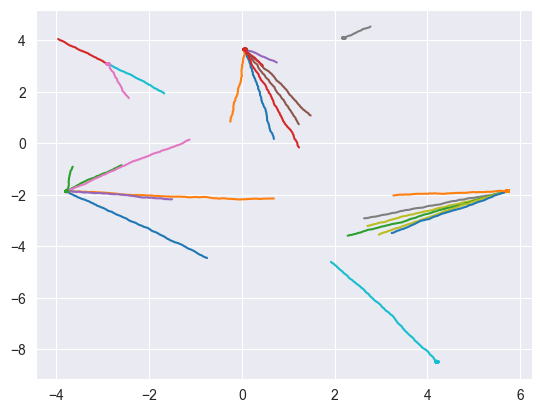

In [106]:
for i in range(num_agents):
    plt.plot(individual_motions[i, :,0], individual_motions[i, :, 1])

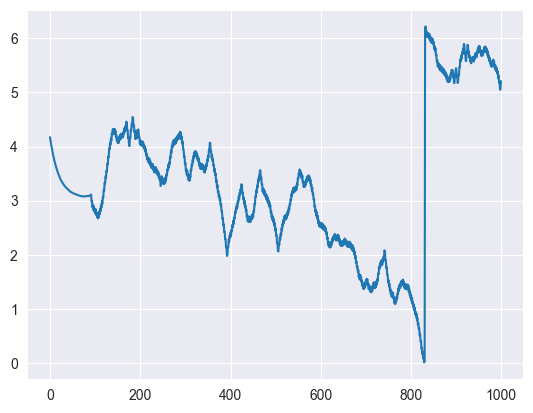

In [109]:
plt.plot(individual_motions[1,:,-1])

### Alignment

In [29]:
al_influence = alignment_influence(agent_pos[2], agent_pos, agent_rot)
al_influence

-1.3152211466147103

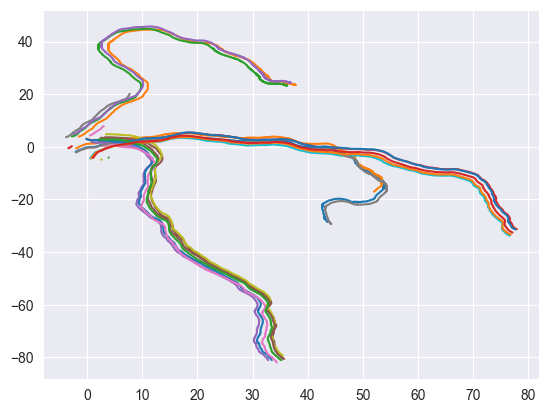

In [30]:
alignment_sim = look_with_neighbors(agent_pos, agent_rot, sensing_radius=1.5, noise=0.5)
for i in range(len(agent_pos)):
    plt.plot(alignment_sim[:,i,0], alignment_sim[:,i,1])

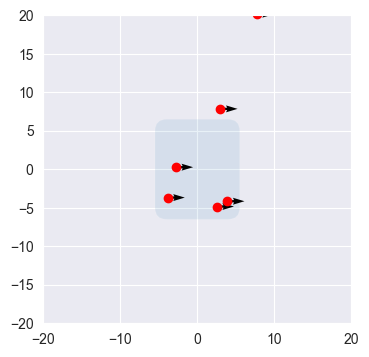

In [31]:
al = inspect_alignment_influence(alignment_sim)

al.save('./../media/gif/alignment1.gif', writer=PillowWriter(fps=10))

### Cohesion

In [32]:
co_influence = cohesion_influence(agent_pos[6], agent_pos, sensing_radius=1.5)
co_influence

-2.105657981403143

[0.52946043 4.3286567 ]
[-0.4881926   0.56526109]
[-3.00771813 -1.45750597]


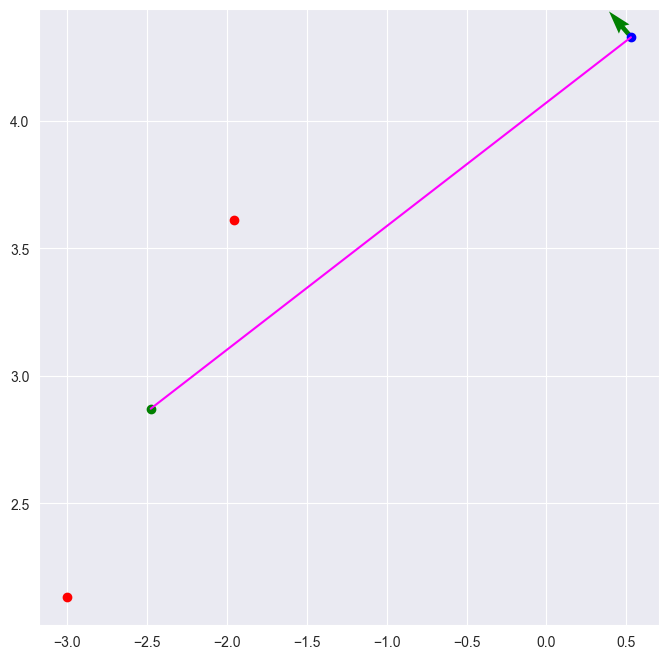

In [33]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))

self = agent_pos[6]
print(self)
neighbors = np.array([[-1.9559693,  3.6110234], [-3.000546, 2.131278]])
average = np.array([-2.4782577, 2.8711507])
corrected = np.array([-0.4881926,  0.56526109])

twopoints = np.array([self, average])
print(corrected)
print(average - self)

ax.scatter(neighbors[:,0], neighbors[:,1], color='red')
ax.scatter(average[0], average[1], color='green')
ax.quiver(self[0], self[1], corrected[0], corrected[1], color='green')
ax.scatter(self[0], self[1], color='blue')
ax.plot(twopoints[:,0], twopoints[:,1], color='magenta')

In [39]:
cohesion_sim = move_with_neighbors(agent_pos, sensing_radius=1.5, noise=0.5, drift=1.)
cohesion_sim

array([[[-2.0919323 , -1.9671919 ],
        [-2.0162005 , -0.5640334 ],
        [ 3.8905182 , -4.0508966 ],
        ...,
        [ 0.7676239 , -4.3822713 ],
        [ 2.137959  ,  2.8670912 ],
        [ 1.0218186 , -4.2190356 ]],

       [[-2.054823  , -1.8743324 ],
        [-2.0941045 , -0.62673086],
        [ 3.8099775 , -4.110169  ],
        ...,
        [ 0.8536029 , -4.3312063 ],
        [ 2.203991  ,  2.9421897 ],
        [ 0.95024216, -4.28887   ]],

       [[-2.0475843 , -1.7745948 ],
        [-2.1389732 , -0.7160998 ],
        [ 3.7255392 , -4.163743  ],
        ...,
        [ 0.80078274, -4.416118  ],
        [ 2.2289243 ,  3.0390315 ],
        [ 0.8608561 , -4.3337045 ]],

       ...,

       [[-2.4548788 , -1.1112658 ],
        [-2.415691  , -1.0167121 ],
        [ 3.2780719 , -4.1464796 ],
        ...,
        [ 0.8705144 , -4.361778  ],
        [ 1.708111  ,  3.5200036 ],
        [ 0.84354323, -4.261282  ]],

       [[-2.4371235 , -1.0128547 ],
        [-2.467253  , -1.10

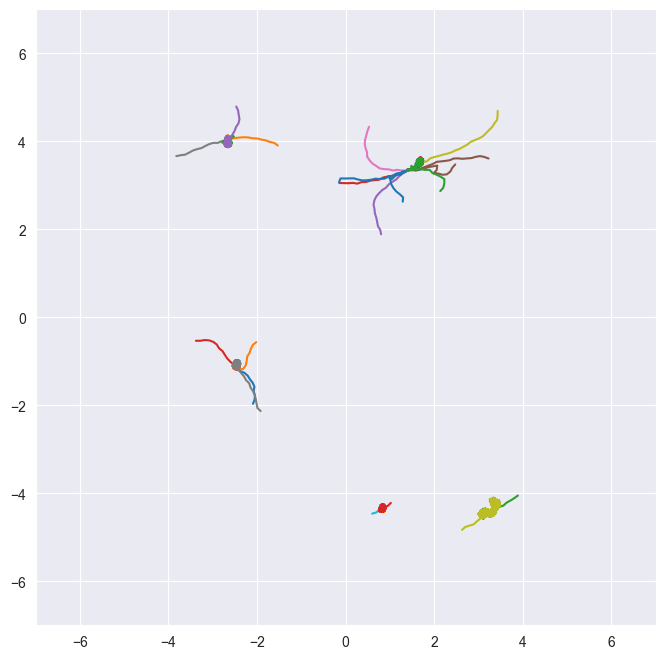

In [40]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim([-7., 7.])
ax.set_ylim([-7., 7.])

for i in range(len(agent_pos)):
    ax.plot(cohesion_sim[:,i,0], cohesion_sim[:,i,1])

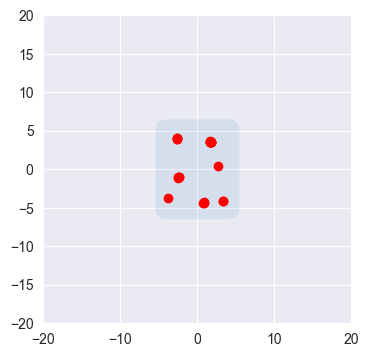

In [41]:
co = inspect_cohesion_influence(cohesion_sim)

co.save('./../media/gif/cohesion1.gif', writer=PillowWriter(fps=10))

### Combined influences

In [68]:
individual_sim = individual_motion(
    agent_position=agent_pos[-1],
    agent_rotation=agent_rot[-1],
    beacon_position=beacon_pos[-1]
)

individual_sim[:,-1]

array([0.27051014, 0.21910715, 0.17557426, 0.1448743 , 0.11628649,
       0.08082221, 0.03766322, 0.00954065, 6.27124029, 6.24408917,
       6.21794216, 6.18615073, 6.1491021 , 6.11543978, 6.08383456,
       6.05783745, 6.03810972, 6.01242087, 5.98540372, 5.96574501,
       5.94084526, 5.9332788 , 5.91530341, 5.89266685, 5.87809614,
       5.87436685, 5.86515066, 5.85223699, 5.85061509, 5.84126282,
       5.84332183, 5.82532335, 5.81515819, 5.81206817, 5.79957891,
       5.797027  , 5.78159571, 5.76496554, 5.76196814, 5.76720184,
       5.75495851, 5.73966027, 5.74248404, 5.74263132, 5.74413759,
       5.75060946, 5.74060637, 5.7272417 , 5.73420942, 5.72439212,
       5.71824265, 5.71782065, 5.72816426, 5.7242269 , 5.71742577,
       5.71845121, 5.72729189, 5.72367728, 5.72767228, 5.72388125,
       5.71910954, 5.71324653, 5.71875382, 5.72409183, 5.71785105,
       5.72312385, 5.73075647, 5.71801442, 5.72515095, 5.72429073,
       5.71582163, 5.70725173, 5.69848055, 5.68473179, 5.68142

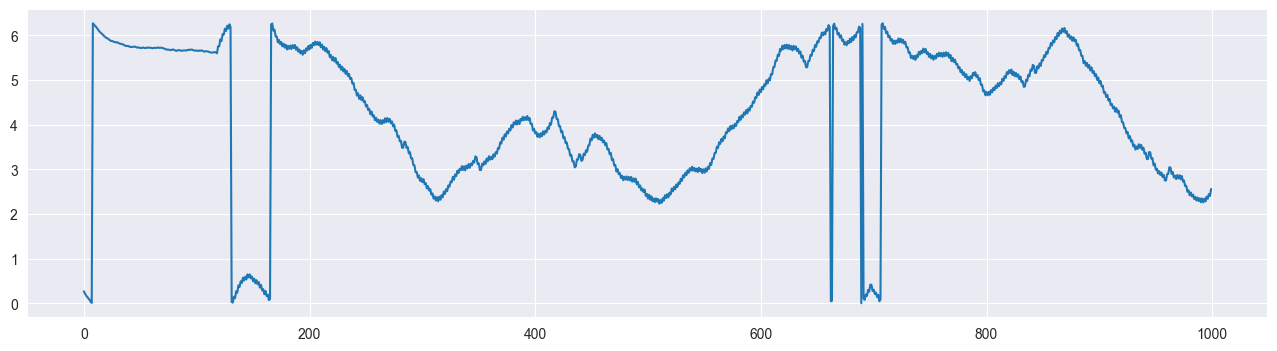

In [69]:
f, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(individual_sim[:,-1])

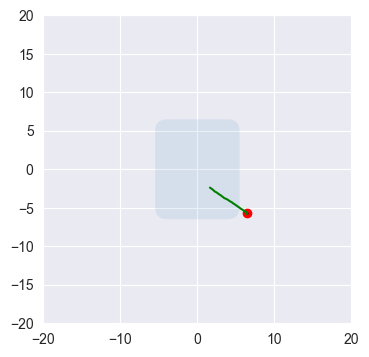

In [71]:
individual_sim_vis = inspect_position_influence(individual_sim[:,0:2], beacon_pos[-1])

individual_sim_vis.save('./../media/gif/individual1.gif', writer=PillowWriter(fps=10))

In [56]:
collective_sim = collective_motion(
    agent_positions=agent_pos,
    agent_rotations=agent_rot,
    alignment_noise=0.5,
    cohesion_noise=0.5,
)

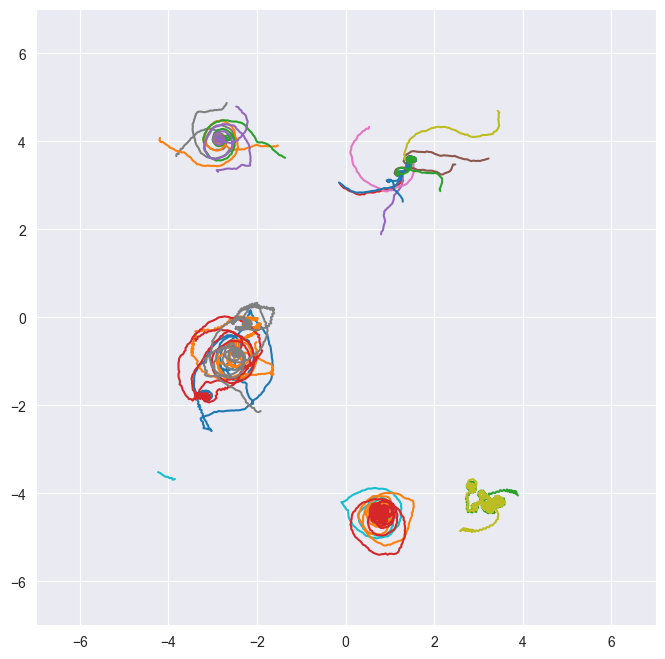

In [43]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_xlim([-7., 7.])
ax.set_ylim([-7., 7.])

for i in range(len(agent_pos)):
    ax.plot(collective_sim[:,i,0], collective_sim[:,i,1])

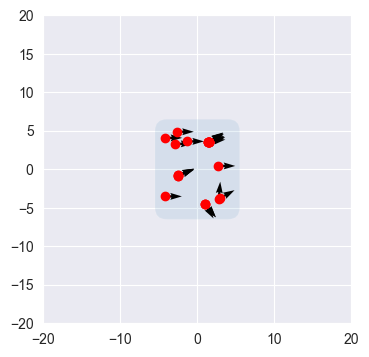

In [44]:
co_sim_vis = inspect_alignment_influence(collective_sim)

co_sim_vis.save('./../media/gif/collective1.gif', writer=PillowWriter(fps=10))